<a href="https://colab.research.google.com/github/xadrijo/neural-network-multiclass-classification-food-images-tensorflow/blob/main/multiclass_image_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-29 16:21:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.253.118.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 23s     

2023-07-29 16:22:05 (21.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 10 directori

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class names
import numpy as np

class_names = np.array(sorted(os.listdir(train_dir)))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """
  Return a random image with a target class name
  """
  target_folder = os.path.join(target_dir, target_class)
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(os.path.join(target_folder, random_image[0]))

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['1260554.jpg']
Image shape: (512, 512, 3)


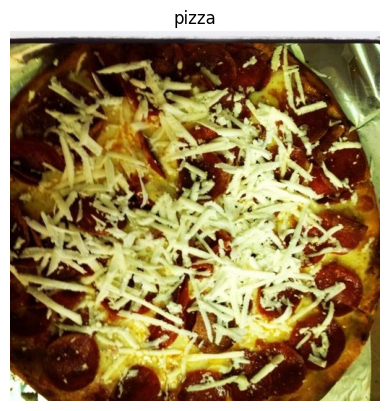

In [6]:
# Visualize, visualize, visualize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

IMG_SIZE = (224, 224)

# Load data in from directories and turn it into batches
# Note: attributes class_mode='categorical'and batch_size=32 are set by default
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [9]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 101ms/step - loss: 2.2350 - accuracy: 0.1888 - val_loss: 2.0431 - val_accuracy: 0.2644
Epoch 2/5
235/235 [==============================] - 23s 98ms/step - loss: 1.8104 - accuracy: 0.3759 - val_loss: 2.1111 - val_accuracy: 0.2776
Epoch 3/5
235/235 [==============================] - 23s 96ms/step - loss: 1.2775 - accuracy: 0.5679 - val_loss: 2.4458 - val_accuracy: 0.2612
Epoch 4/5
235/235 [==============================] - 23s 97ms/step - loss: 0.7032 - accuracy: 0.7728 - val_loss: 3.2289 - val_accuracy: 0.2432
Epoch 5/5
235/235 [==============================] - 23s 96ms/step - loss: 0.2979 - accuracy: 0.9093 - val_loss: 4.6986 - val_accuracy: 0.2276


In [10]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 4.6986 - accuracy: 0.2276


[4.698637962341309, 0.22759999334812164]

In [30]:
# Plot the validation and training data separately
def plot_loss_curve(history):
  """
  Returns separate loss curve for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

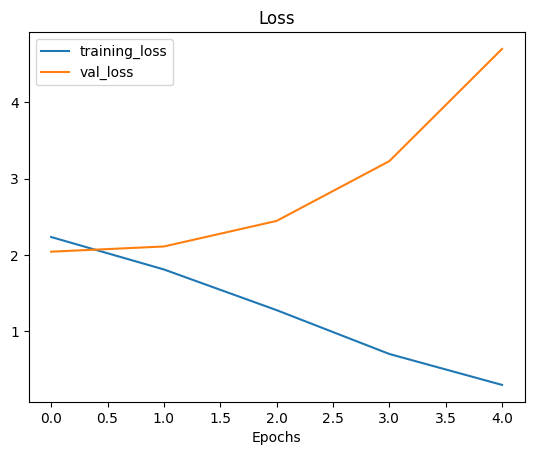

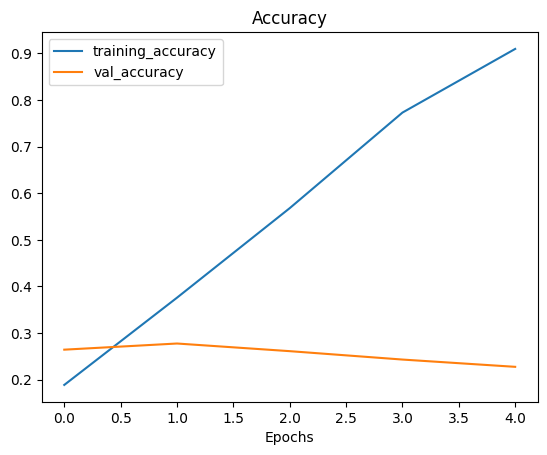

In [31]:
plot_loss_curve(history_1)

**Note:** it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

# 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something. But, it is not generalizing well to unseen data (overfitting).
Let's try and fix overfitting by:

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data).
* **Transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [37]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers
model_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [34]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [39]:
# Fit the model with 2x conv layers removed
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 24s 98ms/step - loss: 2.0712 - accuracy: 0.2533 - val_loss: 1.9647 - val_accuracy: 0.3040
Epoch 2/5
235/235 [==============================] - 23s 98ms/step - loss: 1.7568 - accuracy: 0.4068 - val_loss: 1.9385 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 23s 99ms/step - loss: 1.4055 - accuracy: 0.5441 - val_loss: 1.9952 - val_accuracy: 0.3224
Epoch 4/5
235/235 [==============================] - 23s 99ms/step - loss: 0.9231 - accuracy: 0.7169 - val_loss: 2.2687 - val_accuracy: 0.3144
Epoch 5/5
235/235 [==============================] - 23s 97ms/step - loss: 0.4726 - accuracy: 0.8685 - val_loss: 2.7791 - val_accuracy: 0.2996


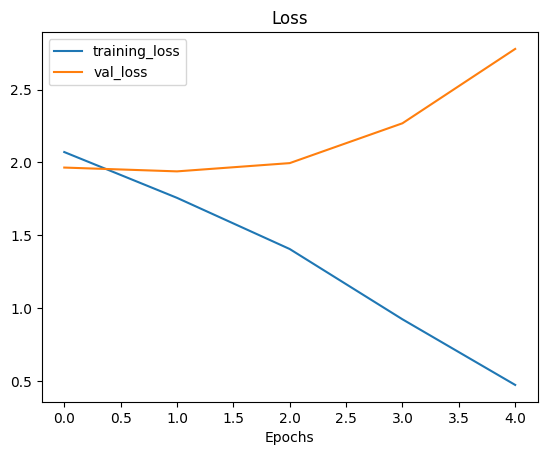

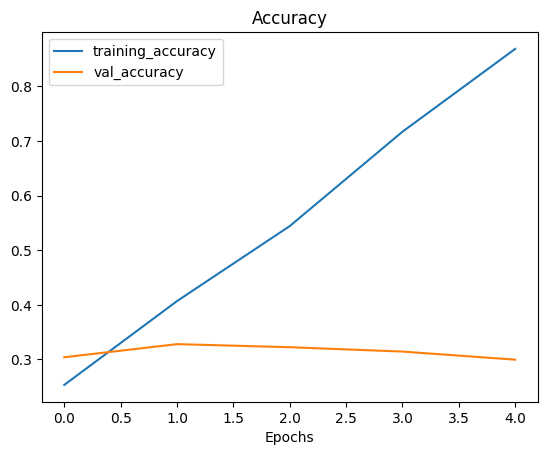

In [40]:
plot_loss_curve(history_2)

Looks like our "simplifying the model" experiment didn't work..! The accuracy went down and overfitting continued... Next step: try data augmentation!

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curve closer)
* Improve validation accuracy

In [41]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224))

Found 7500 images belonging to 10 classes.


In [42]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_3 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (using the same setup as previous models)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [43]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 93s 387ms/step - loss: 2.2362 - accuracy: 0.1704 - val_loss: 2.0206 - val_accuracy: 0.2764
Epoch 2/5
235/235 [==============================] - 92s 391ms/step - loss: 2.0601 - accuracy: 0.2629 - val_loss: 1.9489 - val_accuracy: 0.3284
Epoch 3/5
235/235 [==============================] - 93s 394ms/step - loss: 2.0201 - accuracy: 0.2877 - val_loss: 1.8860 - val_accuracy: 0.3196
Epoch 4/5
235/235 [==============================] - 92s 392ms/step - loss: 1.9947 - accuracy: 0.2977 - val_loss: 1.8643 - val_accuracy: 0.3504
Epoch 5/5
235/235 [==============================] - 92s 392ms/step - loss: 1.9621 - accuracy: 0.3121 - val_loss: 1.8172 - val_accuracy: 0.3808


In [44]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 4.6986 - accuracy: 0.2276


[4.698635578155518, 0.22759999334812164]

In [45]:
model_3.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 1.8172 - accuracy: 0.3808


[1.8172478675842285, 0.3808000087738037]

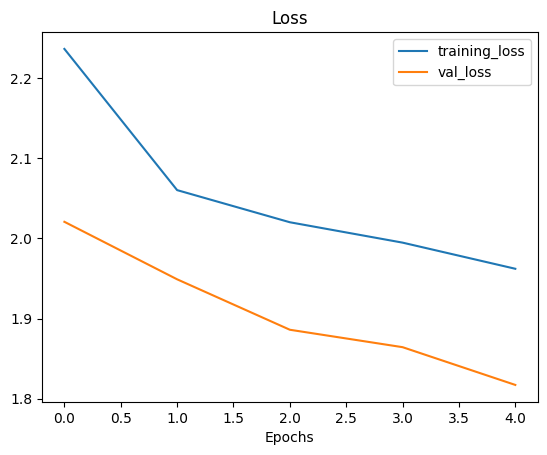

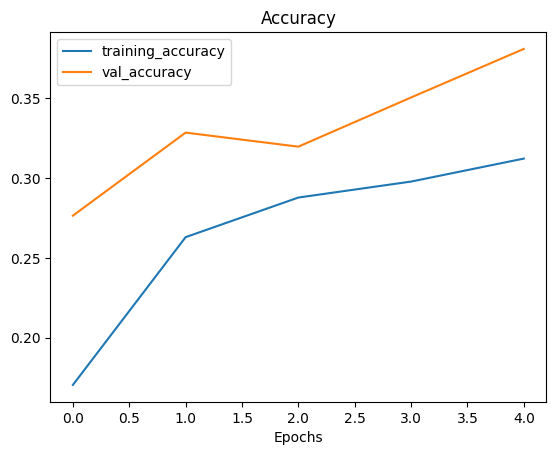

In [46]:
plot_loss_curve(history_3)

That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.
It even looks if we kept it training for longer (more epcohs) the evaluation metrics might continue to improve.

### 7. Repeat until satisfied

We could keep going here. restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take fairly long time.

Good thing there's still one trick we haven't tried yet and that's **tranfer learning**

### Making predictions with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [47]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [48]:
# Download some custom images
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [49]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [50]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 232ms/step


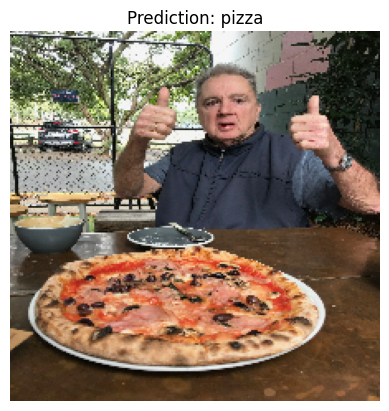

In [51]:
# Make a prediction using model_3
pred_and_plot(model=model_3,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 29ms/step


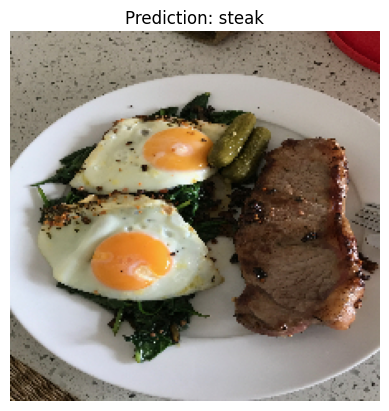

In [52]:
pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 24ms/step


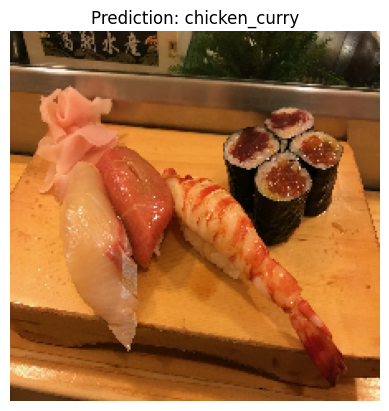

In [53]:
pred_and_plot(model=model_3,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 23ms/step


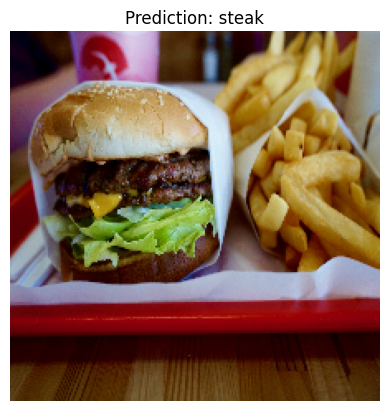

In [55]:
pred_and_plot(model=model_3,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Our model's predictions aren't very good, this is because it's only performing at ~39% accuracy on the test dataset.

### Saving and loading our model

In [56]:
# Save a model
model_3.save("saved_trained_model")

In [57]:
# Load in a model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.8172 - accuracy: 0.3808


[1.8172475099563599, 0.3808000087738037]

In [58]:
# Compare our unsaved model's results (same as above)
model_3.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 1.8172 - accuracy: 0.3808


[1.8172484636306763, 0.3808000087738037]